 ## Importing data

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')

In [2]:
df.describe()


ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

* There does not seem to be any big outliers in the data, and there aren't any missing values in the entries as well

# EDA

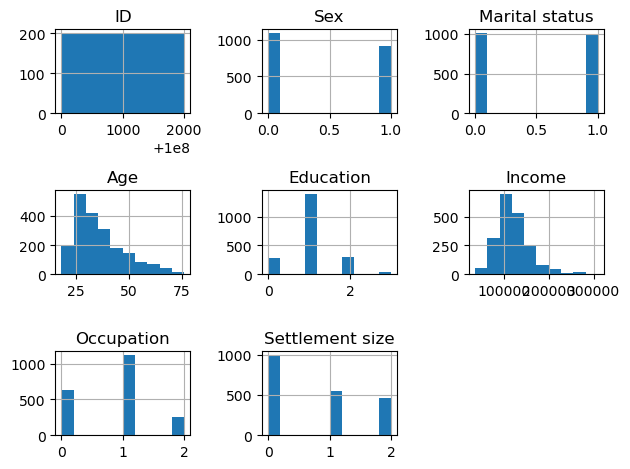

In [4]:
import matplotlib.pyplot as plt
df.hist()
plt.tight_layout()
plt.show()


## Observations
* We should drop ID while running any analysis since it is an identifier  and will not help with any data inference.
* Customer sex has an almost equal distribution between the 2 categories.
* Marital status is almost indentically distributed amonth tits 2 Categroies.
* Both age and income are right skewed and might need some transformation.
* Majority of the customers have ompleted a high school education. There are very few customers in the graduate school category, we could merge the 2 categories 2 form a new one.
* Occupation and Settlement size both have fair bit of observations in each of theri categories.



In [5]:
df.drop('ID', axis = 1, inplace = True)

## Relationship between Variables

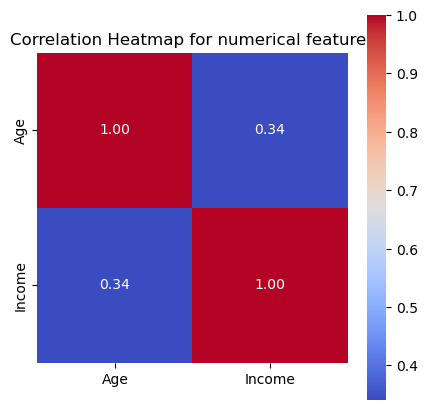

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df_num = ['Age','Income'] # Will not include ID , since its an Identifier.
corr_df_num = df[df_num]
corr_matrix_num = corr_df_num.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix_num,square = True, cmap='coolwarm', fmt = '.2f', annot = True)
plt.title("Correlation Heatmap for numerical features")
plt.show()

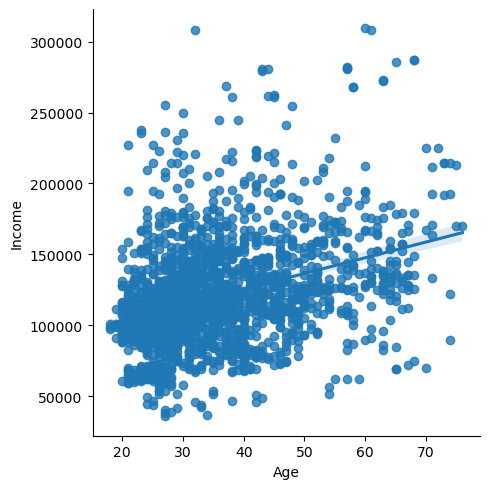

In [7]:
sns.lmplot(x='Age', y='Income', data=df)


* We can see there is a bit of correlation (0.34) between the 2 numerical variables.

In [8]:
df_cat = ['Sex','Marital status','Education','Occupation','Settlement size']
df[df_cat] = df[df_cat].astype('str')


In [9]:
#elationship between categorical features
contingency_tables = {}

for var1 in df_cat:
    for var2 in df_cat:
        if var1 != var2:  # Avoid comparing a variable to itself
            contingency_table = pd.crosstab(df[var1], df[var2])
            table_name = f'{var1}_vs_{var2}'  # You can customize the table name
            contingency_tables[table_name] = contingency_table

# You can now access the contingency tables for different variable pairs
for table_name, table in contingency_tables.items():
    print(f"Contingency Table: {table_name}")
    print(table)
    print()

Contingency Table: Sex_vs_Marital status
Marital status    0    1
Sex                     
0               829  257
1               178  736

Contingency Table: Sex_vs_Education
Education    0    1    2   3
Sex                         
0          255  688  136   7
1           32  698  155  29

Contingency Table: Sex_vs_Occupation
Occupation    0    1    2
Sex                      
0           271  621  194
1           362  492   60

Contingency Table: Sex_vs_Settlement size
Settlement size    0    1    2
Sex                           
0                394  338  354
1                595  206  113

Contingency Table: Marital status_vs_Sex
Sex               0    1
Marital status          
0               829  178
1               257  736

Contingency Table: Marital status_vs_Education
Education         0    1    2   3
Marital status                   
0               287  621   97   2
1                 0  765  194  34

Contingency Table: Marital status_vs_Occupation
Occupation        0   

In [10]:
# Relationship between categorical features
contingency_tables = {}

# Create a set to store unique pairs of variable names
visited_pairs = set()

for i, var1 in enumerate(df_cat):
    for j, var2 in enumerate(df_cat):
        if i < j:  # Ensure that var1 is alphabetically before var2
            contingency_table = pd.crosstab(df[var1], df[var2])
            table_name = f'{var1}_vs_{var2}'  # You can customize the table name
            contingency_tables[table_name] = contingency_table
            visited_pairs.add((var1, var2))

# You can now access the contingency tables for different variable pairs
for table_name, table in contingency_tables.items():
    print(f"Contingency Table: {table_name}")
    print(table)
    print()


Contingency Table: Sex_vs_Marital status
Marital status    0    1
Sex                     
0               829  257
1               178  736

Contingency Table: Sex_vs_Education
Education    0    1    2   3
Sex                         
0          255  688  136   7
1           32  698  155  29

Contingency Table: Sex_vs_Occupation
Occupation    0    1    2
Sex                      
0           271  621  194
1           362  492   60

Contingency Table: Sex_vs_Settlement size
Settlement size    0    1    2
Sex                           
0                394  338  354
1                595  206  113

Contingency Table: Marital status_vs_Education
Education         0    1    2   3
Marital status                   
0               287  621   97   2
1                 0  765  194  34

Contingency Table: Marital status_vs_Occupation
Occupation        0    1    2
Marital status               
0               325  529  153
1               308  584  101

Contingency Table: Marital status_vs_Settle

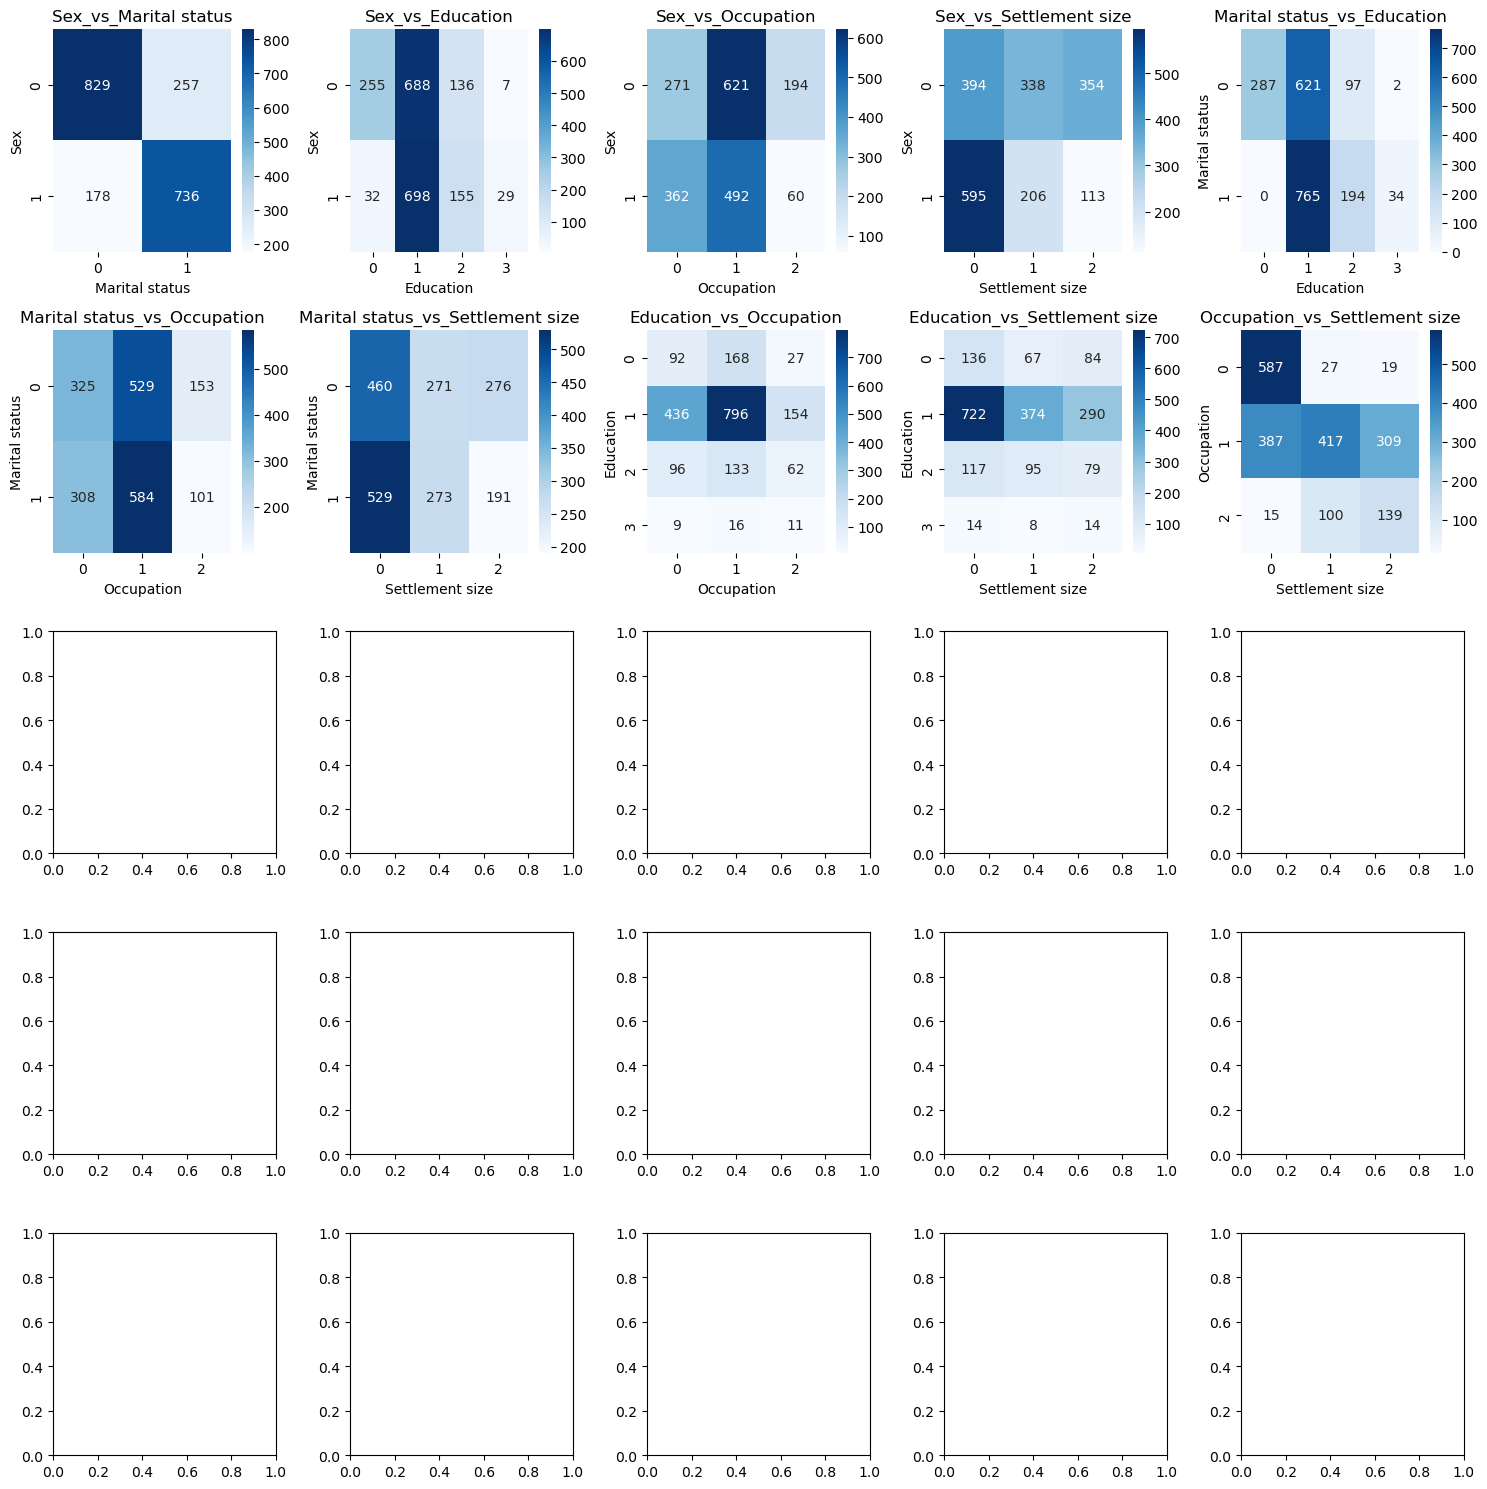

In [11]:
# Define the number of rows and columns for subplots
n_rows = n_columns = len(df_cat)

# Create subplots for each contingency table
fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 15))

# Iterate through contingency tables and create stacked bar plots
for i, (table_name, table) in enumerate(contingency_tables.items()):
    row_idx = i // n_columns
    col_idx = i % n_columns
    ax = axes[row_idx, col_idx]

    # Create a stacked bar plot using seaborn
    sns.heatmap(table, annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(table_name)

# Adjust the layout of subplots for better readability
plt.tight_layout()

# Show the plot
plt.show()






we can see through the visualisations of the contingency tables that there are some interesting relationships between certain categroies: <br>
* More females tend live in smaller settlement (0).
* There are more unskilled/unemployed (0) women than skilled/employed (1) and highly qualified (2) men.
* There are more unmarried men than women
* Married people tend to live in Smaller cities.
* There are a lot of High School graduates who work are unemployed/unskilled(0), but there's almost twice as most who are employed and skilled.
* Most customers who have high- school education live in small cities.
* Most unemployed/unskilled customers libe in smaller cities, while skilled/ employed customers are prety evenly distributed across all settlement sizes.


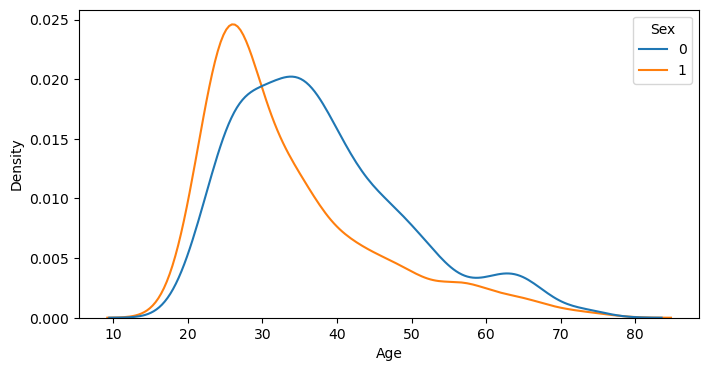

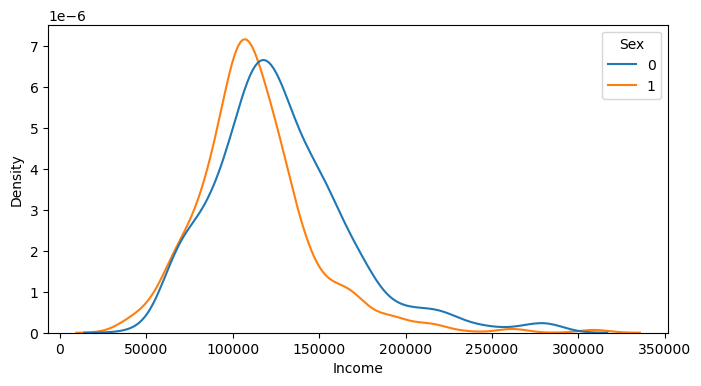

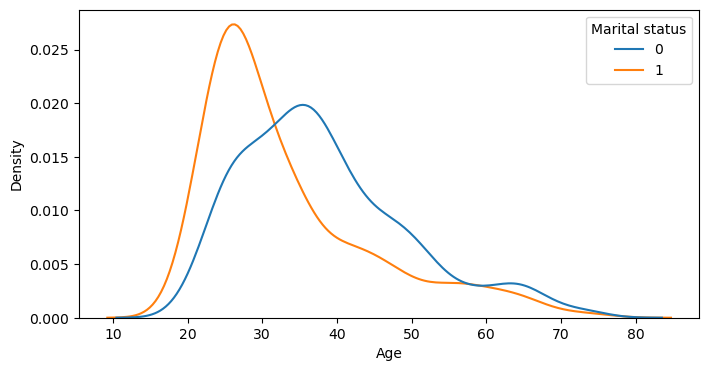

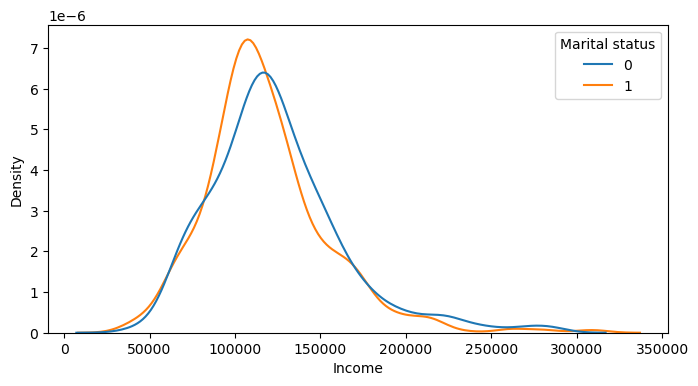

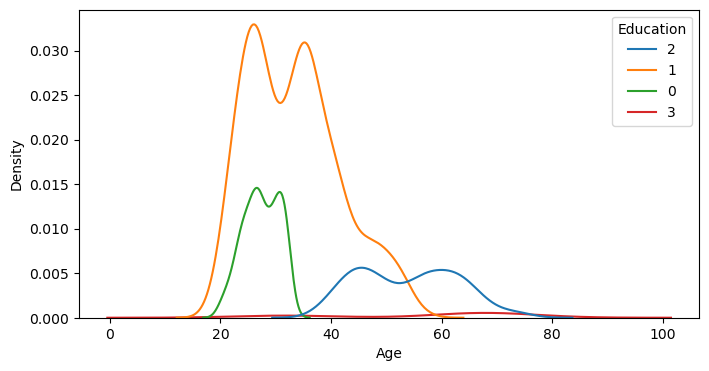

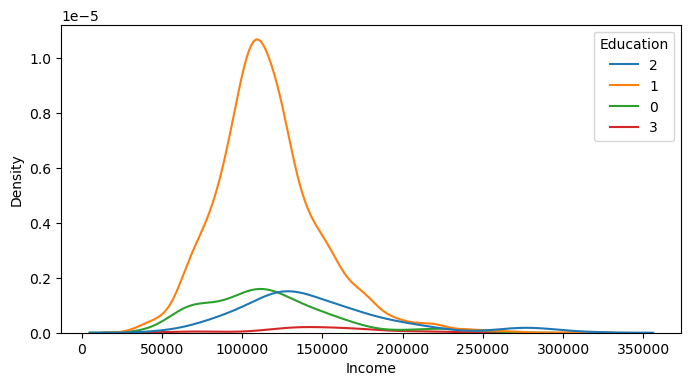

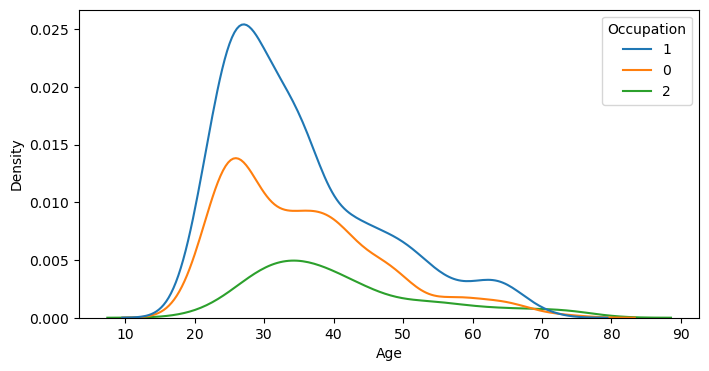

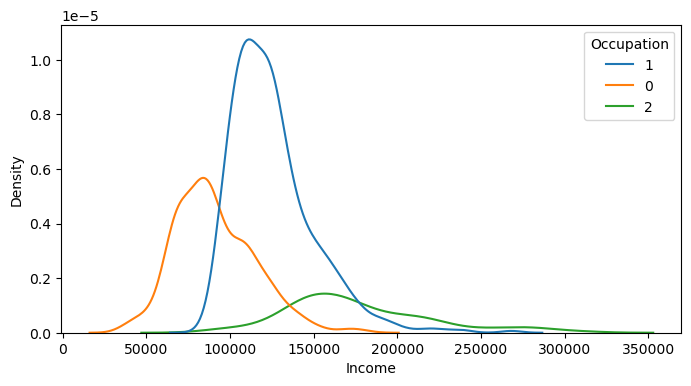

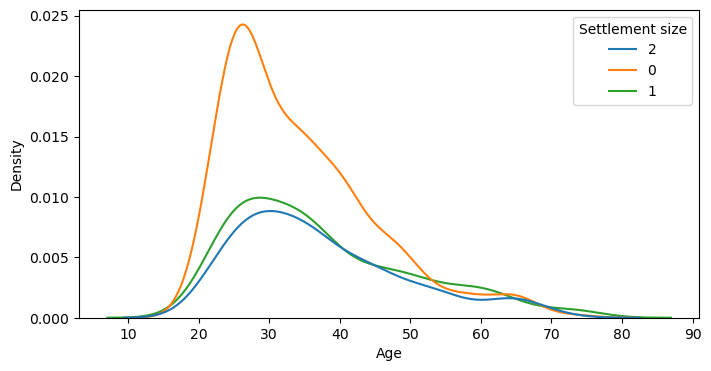

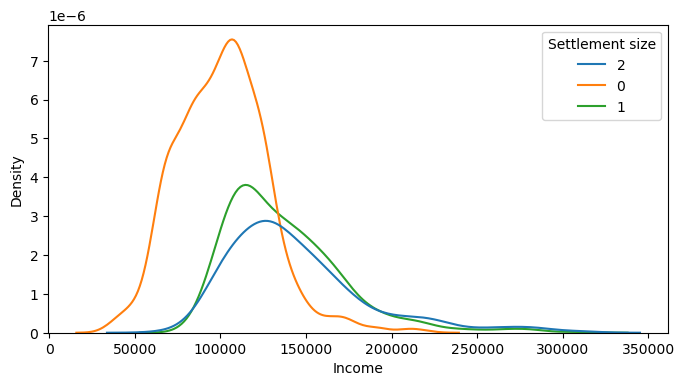

In [12]:
# categorical vs numerical variables
for category in df_cat:
    for numerical in df_num:
        if numerical != 'ID':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=df, x=numerical, hue=category) 

## Transformation and scaling

* Since clustering algorithms assume that the data is normalised , we will normalise the skewed numerical variables so that we get accurate results while clustering

In [13]:
import numpy as np
Age_log = np.log(df['Age'])
Income_log = np.log(df['Income'])


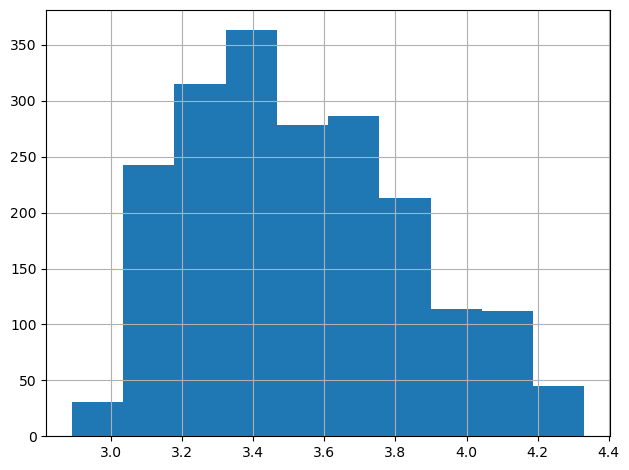

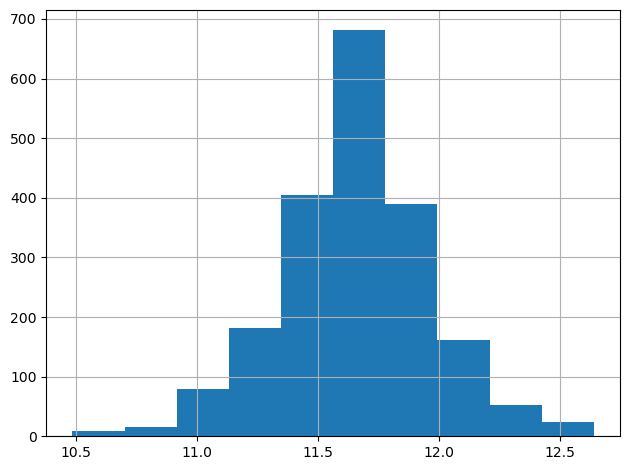

In [14]:
Age_log.hist()
plt.tight_layout()
plt.show()

Income_log.hist()
plt.tight_layout()
plt.show()


* The 2 features look much more normalised now, not perfect but good enough for further analysis.

In [16]:
df_transformed = df.copy()
df_transformed['Transf_income'] = Income_log
df_transformed['Transf_age'] = Age_log
df_transformed = df_transformed.drop(['Income', 'Age'], axis=1)


In [17]:
df_transformed

Sex Marital status Education Occupation Settlement size  Transf_income  \
0      0              0         2          1               2      11.733426   
1      1              1         1          1               2      11.923531   
2      0              0         1          0               0      11.398748   
3      0              0         1          1               1      12.052717   
4      0              0         1          1               1      11.911910   
...   ..            ...       ...        ...             ...            ...   
1995   1              0         1          0               0      11.724199   
1996   1              1         1          1               0      11.676268   
1997   0              0         0          0               0      11.366743   
1998   1              1         1          0               0      11.492396   
1999   0              0         0          0               0      11.133362   

      Transf_age  
0       4.204693  
1       3.091042  
2       3.891820  
3       3.806662  
4       3.970292  
...          ...  
1995    3.850148  
1996    3.295837  
1997    3.433987  
1998    3.178054  
1999    3.218876  

[2000 rows x 7 columns]

Here, we have dropped the ID column, and replaced original income and age columns with their tranformed values. These will act as the final features for further analysis.

* Since clustering analysis measures similarities based on distances, it is important that the data is scaled to get accurate clusters.

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Y = scaler.fit_transform(df_transformed)


In [19]:
Y[0]

array([0.        , 0.        , 0.66666667, 0.5       , 1.        ,
       0.57839313, 0.91249369])

## KMeans Clustering

### Elbow Method
Here, we'll obtain a dictionary,where the keys are values of k (number of clusters), and the values are the corresponding sums of squared distances. We will then plot them to determine the optimal number of clusters.

In [20]:
from sklearn.cluster import KMeans

sum_of_sqr_dist = {}
for k in range(1, 10):
    km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
    km = km.fit(Y)
    sum_of_sqr_dist[k] = km.inertia_

/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

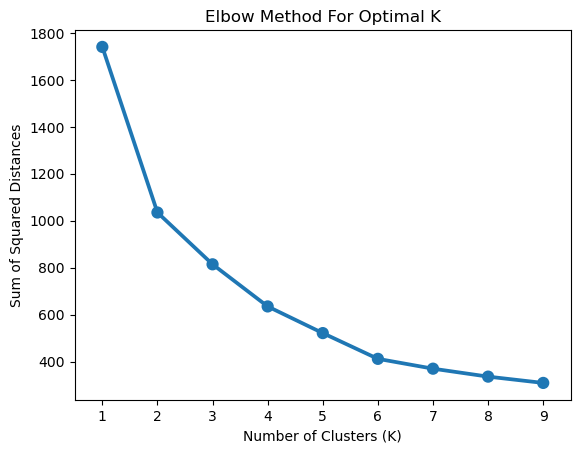

In [21]:
import seaborn as sns
sns.pointplot(x = list(sum_of_sqr_dist.keys()), y = list(sum_of_sqr_dist.values()))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal K')
plt.show()

* We can observe the clusters forming an albow at around 5-6 clusters. The curve is not highly distinct/distinct and we could probably use more than 5 clusters as well, but more or less variance explained by each cluster flattens down aftr 4-5 clusters. 
* We'll further use Silhouette scores to validate our assumption.


### Silhouette Scores

/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

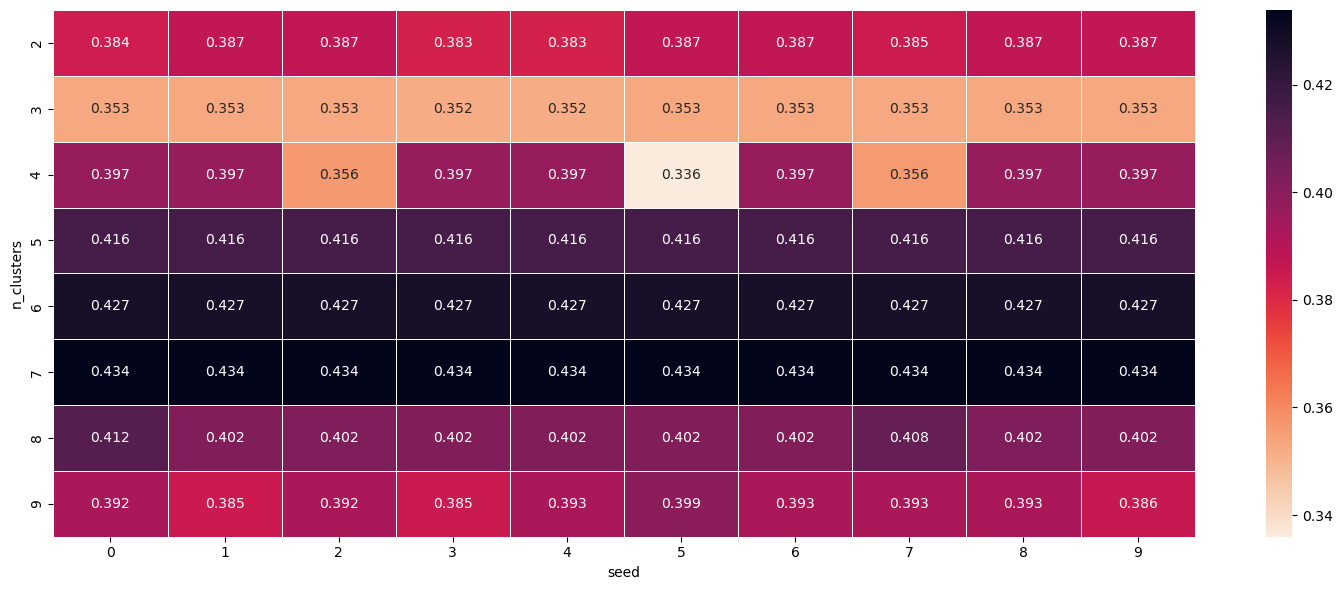

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 10)
random_range  =range(0, 10)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, random_state=r)
        cluster_labels=clusterer.fit_predict(Y)
        silhouette_avg=silhouette_score(Y, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

From the heatmap we can see that Silhouette score peaks at 6 or 7 clusters, which is in line with the assumption we made through he elbow method. We'll get cohesive clusters where each data point is more similar to its cluster compared to otehrs if we use 6 or 7 clusters.

In [23]:
Model = KMeans(n_clusters = 6,
               init = 'k-means++',
               max_iter = 1000)
Model.fit(Y) 

/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=6)

In [24]:
labels = Model.labels_


In [25]:
Y_pd = pd.DataFrame(Y)


/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/arnavsharma/o

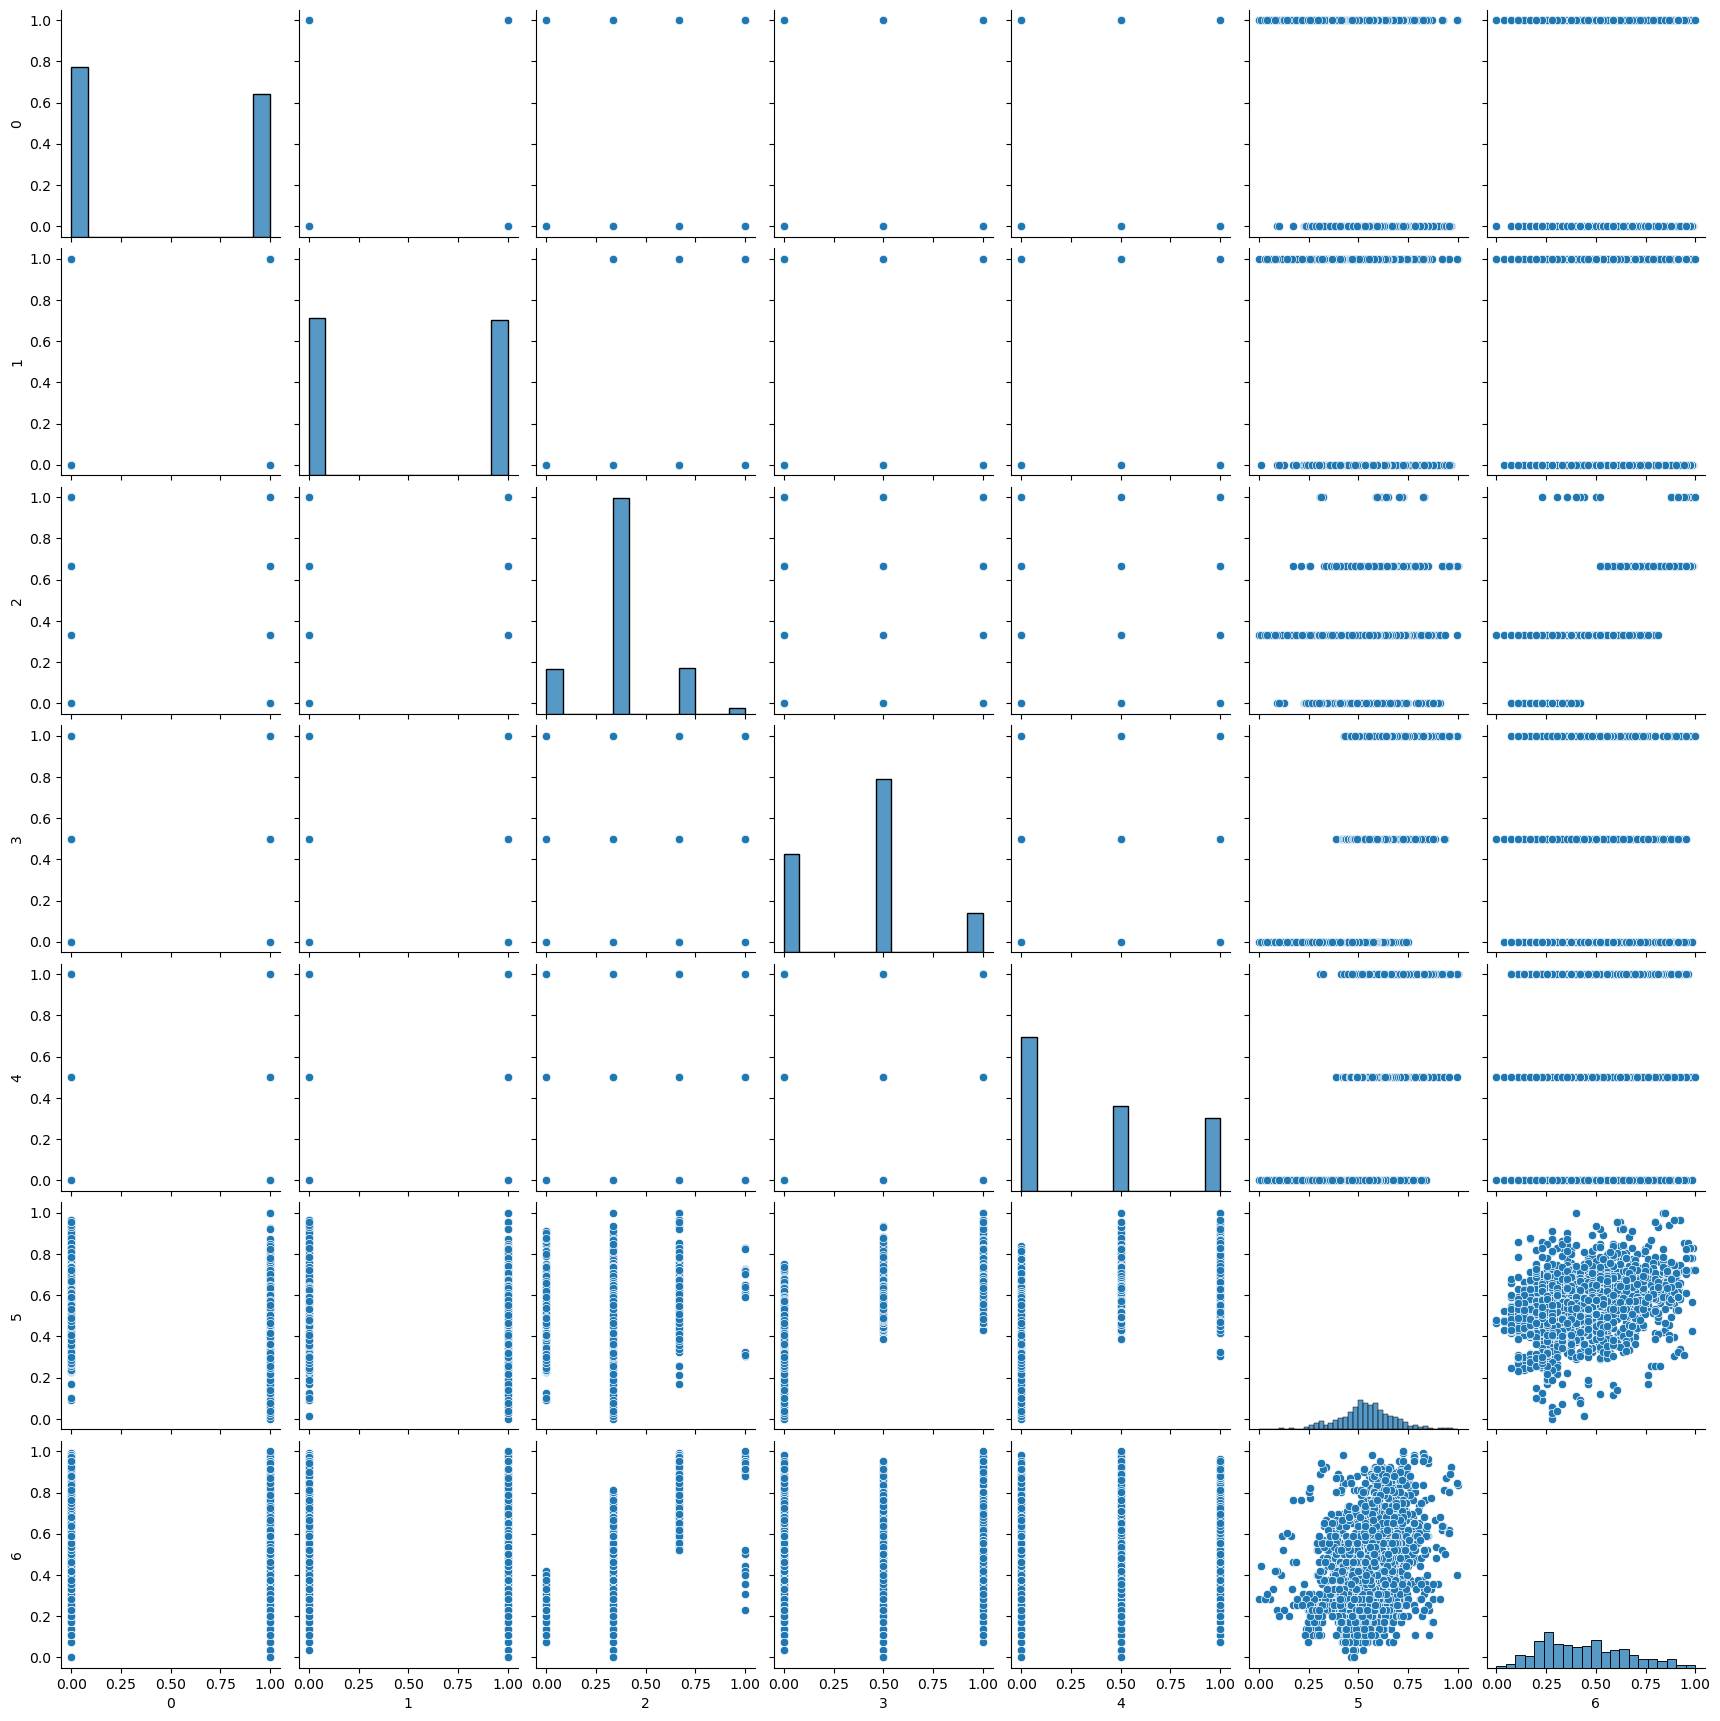

In [26]:
#Visualising Clusters
sns.pairplot(Y_pd, palette='viridis')
plt.show()

It would be better to visualise the clusters through PCA since 7 variables cannot fit in a visualisation

In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
Y_pca = pca.fit_transform(Y)
Y_pca_df = pd.DataFrame(data=Y_pca, columns=['Y1', 'Y2', 'Y3'])
# even though more principal components might be better to represent the data, it would not be easy to visualise them and would defeat the purpose of th e task

In [150]:
Y_pca_df['Labels'] = labels

In [151]:
Y_pca_df.head()

Y1        Y2        Y3  Labels
0  0.829180  0.351029 -0.162564       1
1 -0.532059  0.719347 -0.230627       1
2  0.489762 -0.693245  0.175378       2
3  0.712261 -0.028386 -0.049268       1
4  0.718283 -0.036820 -0.052714       1

In [152]:
Y_pca_df['Labels'] = Y_pca_df['Labels'].astype(str)


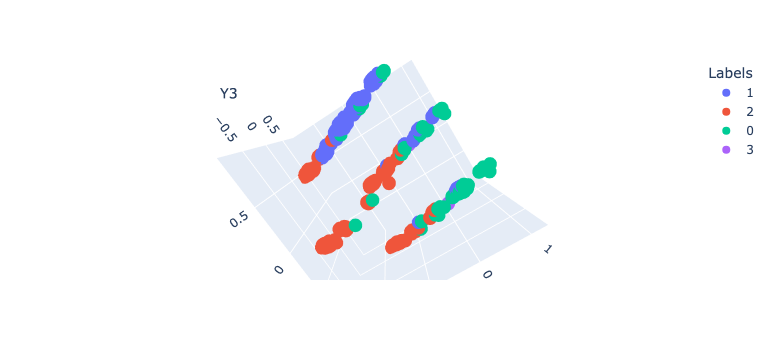

In [158]:
import plotly.express as px

fig = px.scatter_3d(Y_pca_df, x='Y1', y='Y2', z='Y3',
              color=Y_pca_df['Labels'])
fig.show()

We can notice that the clusters are well separated

In [153]:
results_df = df.copy()
results_df['Labels'] = Model.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.2 KB


In [154]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T

In [155]:
summary[0]

count           mean           std      min       25%  \
Sex              306.0       1.000000      0.000000      1.0       1.0   
Marital status   306.0       1.000000      0.000000      1.0       1.0   
Age              306.0      34.284314     13.001925     18.0      25.0   
Education        306.0       1.333333      0.572598      1.0       1.0   
Income           306.0  136536.702614  38103.456491  88800.0  108455.0   
Occupation       306.0       1.183007      0.403881      0.0       1.0   
Settlement size  306.0       1.352941      0.511771      0.0       1.0   
Labels           306.0       0.000000      0.000000      0.0       0.0   

                      50%       75%       max  
Sex                   1.0       1.0       1.0  
Marital status        1.0       1.0       1.0  
Age                  29.0      40.0      76.0  
Education             1.0       2.0       3.0  
Income           126778.5  155107.0  309364.0  
Occupation            1.0       1.0       2.0  
Settlement size       1.0       2.0       2.0  
Labels                0.0       0.0       0.0

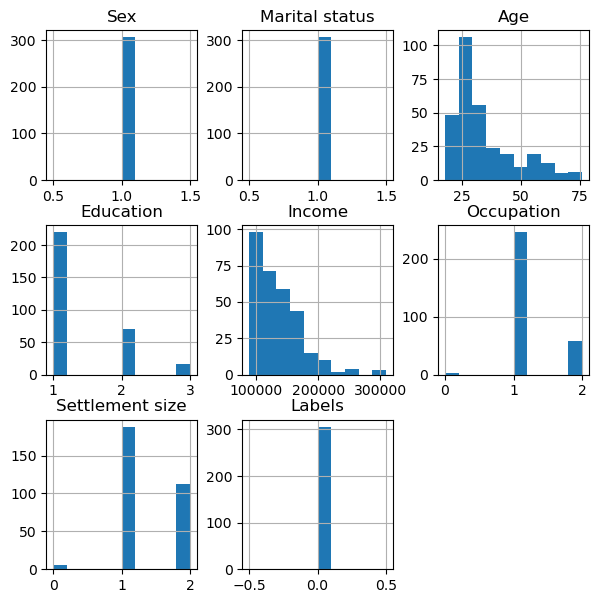

In [157]:
results_df[results_df['Labels'] == 0].hist(figsize=(7,7));


In [39]:
summary[1]

count           mean           std      min       25%  \
Sex              312.0       0.000000      0.000000      0.0      0.00   
Marital status   312.0       0.000000      0.000000      0.0      0.00   
Age              312.0      37.567308     10.633108     21.0     29.75   
Education        312.0       0.737179      0.579524      0.0      0.00   
Income           312.0  102566.410256  26584.893960  43684.0  81804.00   
Occupation       312.0       0.365385      0.501913      0.0      0.00   
Settlement size  312.0       0.060897      0.239526      0.0      0.00   
Labels           312.0       1.000000      0.000000      1.0      1.00   

                      50%        75%       max  
Sex                   0.0       0.00       0.0  
Marital status        0.0       0.00       0.0  
Age                  36.0      42.00      74.0  
Education             1.0       1.00       2.0  
Income           103618.5  120396.75  219319.0  
Occupation            0.0       1.00       2.0  
Settlement size       0.0       0.00       1.0  
Labels                1.0       1.00       1.0

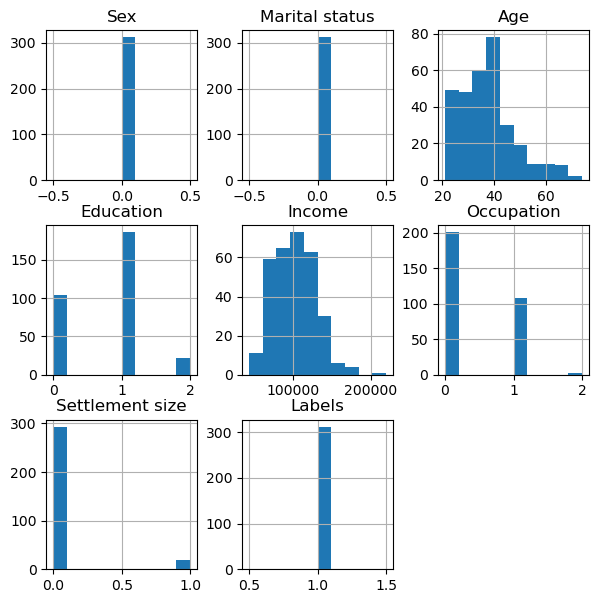

In [40]:
results_df[results_df['Labels'] == 1].hist(figsize=(7,7));


In [41]:
summary[2]

count           mean           std      min       25%  \
Sex              517.0       0.000000      0.000000      0.0       0.0   
Marital status   517.0       0.000000      0.000000      0.0       0.0   
Age              517.0      40.001934     11.945532     20.0      31.0   
Education        517.0       0.822050      0.612576      0.0       0.0   
Income           517.0  145373.611219  38286.684815  82398.0  119276.0   
Occupation       517.0       1.266925      0.484577      0.0       1.0   
Settlement size  517.0       1.529981      0.507283      0.0       1.0   
Labels           517.0       2.000000      0.000000      2.0       2.0   

                      50%       75%       max  
Sex                   0.0       0.0       0.0  
Marital status        0.0       0.0       0.0  
Age                  37.0      47.0      75.0  
Education             1.0       1.0       2.0  
Income           136323.0  159757.0  287247.0  
Occupation            1.0       2.0       2.0  
Settlement size       2.0       2.0       2.0  
Labels                2.0       2.0       2.0

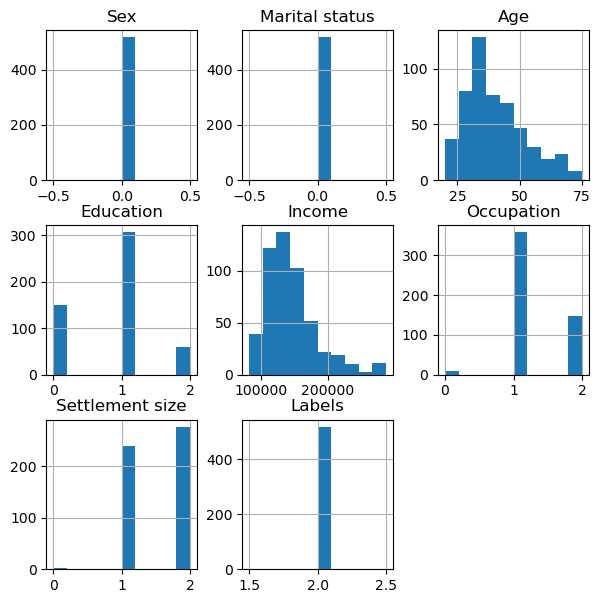

In [42]:
results_df[results_df['Labels'] == 2].hist(figsize=(7,7));


In [43]:
summary[3]

count          mean           std      min      25%  \
Sex              178.0      1.000000      0.000000      1.0      1.0   
Marital status   178.0      0.000000      0.000000      0.0      0.0   
Age              178.0     35.146067      9.755833     19.0     27.0   
Education        178.0      0.932584      0.558403      0.0      1.0   
Income           178.0  97997.241573  21702.050536  36760.0  80892.5   
Occupation       178.0      0.370787      0.507169      0.0      0.0   
Settlement size  178.0      0.073034      0.260926      0.0      0.0   
Labels           178.0      3.000000      0.000000      3.0      3.0   

                      50%       75%       max  
Sex                   1.0       1.0       1.0  
Marital status        0.0       0.0       0.0  
Age                  34.5      41.0      70.0  
Education             1.0       1.0       3.0  
Income           101511.0  113265.0  143321.0  
Occupation            0.0       1.0       2.0  
Settlement size       0.0       0.0       1.0  
Labels                3.0       3.0       3.0

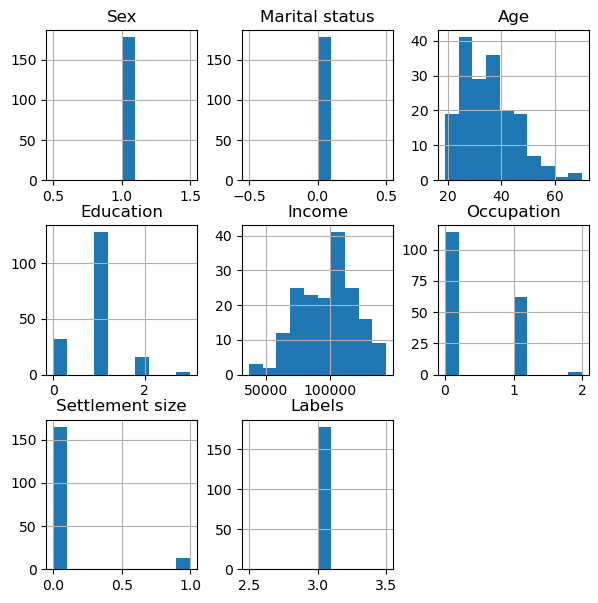

In [44]:
results_df[results_df['Labels'] == 3].hist(figsize=(7,7));


In [45]:
summary[4]


count           mean           std      min       25%  \
Sex              430.0       1.000000      0.000000      1.0      1.00   
Marital status   430.0       1.000000      0.000000      1.0      1.00   
Age              430.0      32.416279     10.911221     18.0     25.00   
Education        430.0       1.211628      0.467453      1.0      1.00   
Income           430.0  102142.332558  25801.373992  35832.0  86281.25   
Occupation       430.0       0.427907      0.495352      0.0      0.00   
Settlement size  430.0       0.011628      0.107329      0.0      0.00   
Labels           430.0       4.000000      0.000000      4.0      4.00   

                      50%        75%       max  
Sex                   1.0       1.00       1.0  
Marital status        1.0       1.00       1.0  
Age                  28.5      36.00      71.0  
Education             1.0       1.00       3.0  
Income           102323.5  120459.25  207262.0  
Occupation            0.0       1.00       1.0  
Settlement size       0.0       0.00       1.0  
Labels                4.0       4.00       4.0

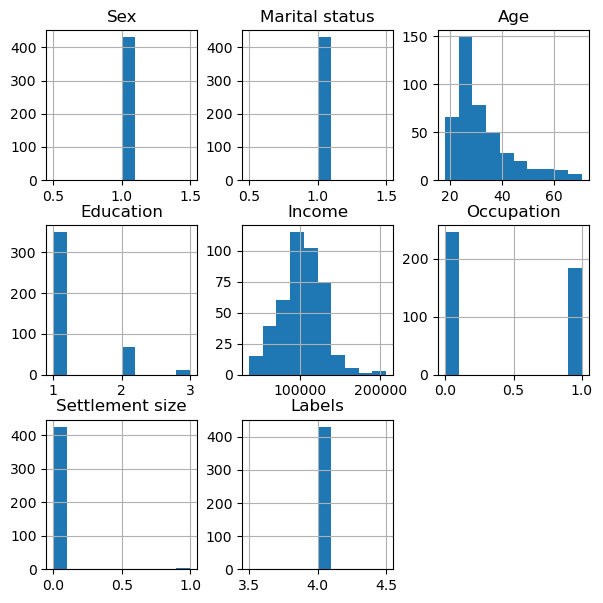

In [51]:
results_df[results_df['Labels'] == 4].hist(figsize=(7,7));


In [47]:
summary[5]

count           mean           std      min      25%  \
Sex              257.0       0.000000      0.000000      0.0      0.0   
Marital status   257.0       1.000000      0.000000      1.0      1.0   
Age              257.0      33.968872     10.759035     18.0     26.0   
Education        257.0       1.268482      0.501851      1.0      1.0   
Income           257.0  122976.723735  38529.241076  62263.0  96769.0   
Occupation       257.0       0.933852      0.630834      0.0      1.0   
Settlement size  257.0       0.918288      0.827468      0.0      0.0   
Labels           257.0       5.000000      0.000000      5.0      5.0   

                      50%       75%       max  
Sex                   0.0       0.0       0.0  
Marital status        1.0       1.0       1.0  
Age                  31.0      40.0      67.0  
Education             1.0       1.0       3.0  
Income           115369.0  146519.0  280570.0  
Occupation            1.0       1.0       2.0  
Settlement size       1.0       2.0       2.0  
Labels                5.0       5.0       5.0

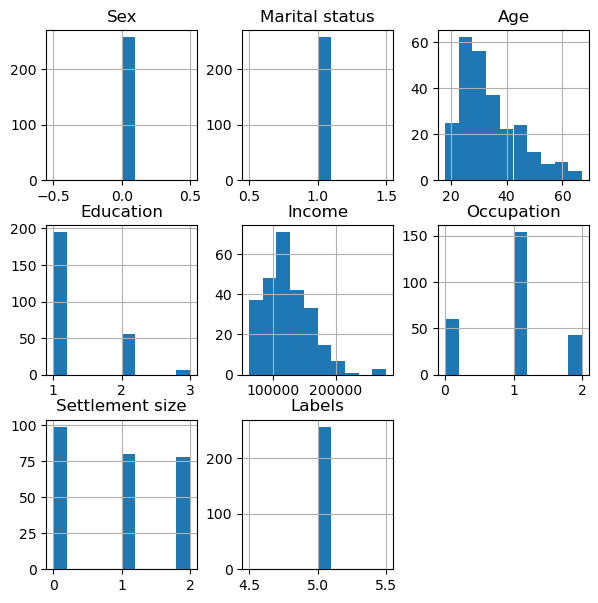

In [48]:
results_df[results_df['Labels'] == 5].hist(figsize=(7,7));


## Hierarchical Clustering

Since we had already standardised and scales the data for KMeans clustering, we'll use the same dataframe for Hierarchal analysis as well.

In [53]:
new_df = df_transformed.copy()


In [56]:
new_df = new_df.astype(float)  # Convert all columns to float


In [55]:
new_df.head()

Sex  Marital status  Education  Occupation  Settlement size  Transf_income  \
0  0.0             0.0        2.0         1.0              2.0      11.733426   
1  1.0             1.0        1.0         1.0              2.0      11.923531   
2  0.0             0.0        1.0         0.0              0.0      11.398748   
3  0.0             0.0        1.0         1.0              1.0      12.052717   
4  0.0             0.0        1.0         1.0              1.0      11.911910   

   Transf_age  
0    4.204693  
1    3.091042  
2    3.891820  
3    3.806662  
4    3.970292

In [57]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(
                       pdist(new_df, metric='euclidean')),
                    columns=labels, index=labels)
row_dist

2         0         1         2         2         1         2  \
2   0.000000  2.067935  2.491967  1.503454  1.444576  2.538534  1.451425   
0   2.067935  0.000000  2.813653  1.878510  1.942476  2.686482  1.942799   
1   2.491967  2.813653  0.000000  1.560425  1.506483  0.590034  1.523823   
2   1.503454  1.878510  1.560425  0.000000  0.215874  1.446310  0.187689   
2   1.444576  1.942476  1.506483  0.215874  0.000000  1.474106  0.048870   
..       ...       ...       ...       ...       ...       ...       ...   
3   2.669417  2.572154  1.052452  1.763467  1.746330  1.054640  1.752257   
4   2.798086  2.025606  1.852623  1.844629  1.873611  1.763595  1.880382   
1   3.119045  2.903037  1.100289  1.899855  1.893365  1.132124  1.908010   
4   3.018623  2.278914  1.586894  2.170048  2.191719  1.515014  2.201596   
1   3.214329  2.939508  1.234214  2.047122  2.042244  1.294539  2.061370   

           2         5         5  ...         4         1         3         3  \
2   1.901434  2.459071  2.806219  ...  2.967311  2.246656  2.668048  2.728659   
0   2.068367  2.835504  2.465718  ...  2.353577  2.613763  2.620468  2.567623   
1   2.390334  1.526135  2.400925  ...  1.491690  1.069032  1.008559  1.031958   
2   1.038165  2.026787  1.795947  ...  2.178320  1.056700  1.815385  1.865299   
2   1.113863  2.005007  1.852650  ...  2.166652  1.011056  1.775460  1.841793   
..       ...       ...       ...  ...       ...       ...       ...       ...   
3   2.507772  1.763490  2.527489  ...  1.172922  1.421569  0.216582  0.403408   
4   2.077196  1.930836  1.468589  ...  1.086645  1.577385  1.558136  1.484513   
1   2.581829  2.402965  2.550619  ...  1.734525  1.570291  1.507465  1.428869   
4   2.757983  1.749493  2.314732  ...  0.336363  1.931673  1.252656  1.106121   
1   2.682430  2.535470  2.625091  ...  1.751025  1.729374  1.631131  1.495597   

           1         3         4         1         4         1  
2   2.273188  2.669417  2.798086  3.119045  3.018623  3.214329  
0   2.567720  2.572154  2.025606  2.903037  2.278914  2.939508  
1   1.031929  1.052452  1.852623  1.100289  1.586894  1.234214  
2   1.082279  1.763467  1.844629  1.899855  2.170048  2.047122  
2   1.049459  1.746330  1.873611  1.893365  2.191719  2.042244  
..       ...       ...       ...       ...       ...       ...  
3   1.417457  0.000000  1.519723  1.516893  1.226965  1.657586  
4   1.504110  1.519723  0.000000  2.028519  1.023563  2.073806  
1   1.487583  1.516893  2.028519  0.000000  1.755361  0.317395  
4   1.848400  1.226965  1.023563  1.755361  0.000000  1.769342  
1   1.612749  1.657586  2.073806  0.317395  1.769342  0.000000  

[2000 rows x 2000 columns]

In [58]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(new_df, metric='euclidean'),
                    method='complete')

In [59]:
pd.DataFrame(row_clusters,
...              columns=['row label 1',
...                       'row label 2',
...                       'distance',
...                       'no. of items in clust.'],
...              index=['cluster %d' % (i + 1) for i in
...                     range(row_clusters.shape[0])])


row label 1  row label 2  distance  no. of items in clust.
cluster 1           673.0        821.0  0.000116                     2.0
cluster 2           478.0       1957.0  0.000139                     2.0
cluster 3           867.0        933.0  0.000271                     2.0
cluster 4          1363.0       1840.0  0.000295                     2.0
cluster 5           351.0        954.0  0.000314                     2.0
...                   ...          ...       ...                     ...
cluster 1995       3979.0       3990.0  3.031939                   919.0
cluster 1996       3984.0       3991.0  3.249116                   791.0
cluster 1997       3992.0       3993.0  3.628808                   290.0
cluster 1998       3994.0       3995.0  3.854108                  1710.0
cluster 1999       3996.0       3997.0  4.632946                  2000.0

[1999 rows x 4 columns]

We'll make a dendogram to determine the number of clusters needed

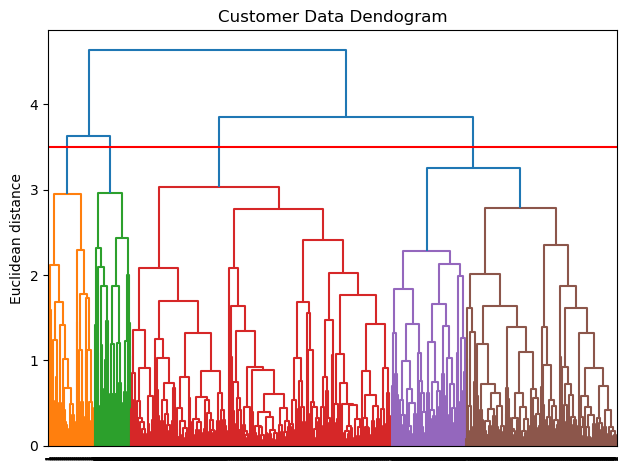

In [130]:
 from scipy.cluster.hierarchy import dendrogram
 row_dendr = dendrogram(row_clusters,
                        labels=labels,
                        )
 
plt.title('Customer Data Dendogram')
plt.ylabel('Euclidean distance')
plt.axhline(y = 3.5, color = 'r', linestyle = '-')
plt.tight_layout()
plt.show()

* From the above dendogram we can conclude that 5-6 clusters are appropriate for the data

In [131]:
>>> from sklearn.cluster import AgglomerativeClustering
>>> ac = AgglomerativeClustering(n_clusters=4,
...                              affinity='euclidean',
...                              linkage='complete')
>>> labels = ac.fit_predict(new_df)
>>> print('Cluster labels: %s' % labels)


Cluster labels: [0 0 2 ... 2 2 2]


/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [132]:
cl = ac.fit_predict(new_df)

/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [133]:
silhouette_score(new_df, cl)

0.24518531070714167

In [134]:
row_clusters_new = linkage(new_df, method='complete', metric='euclidean')


### Checking what clustering parameters work the best using Silhouette scores

In [135]:
 from sklearn.cluster import AgglomerativeClustering
 ac1 = AgglomerativeClustering(n_clusters=4,
                              affinity='euclidean',
                              linkage='ward')
labels = ac1.fit_predict(new_df)
print('Cluster labels: %s' % labels)

Cluster labels: [0 0 3 ... 3 2 3]


/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [136]:
cl1 = ac1.fit_predict(new_df)
silhouette_score(new_df, cl1)

/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.21785218897491831

In [148]:
 from sklearn.cluster import AgglomerativeClustering
 ac2 = AgglomerativeClustering(n_clusters=4,
                              affinity='euclidean',
                              linkage='average')
labels = ac2.fit_predict(new_df)
print('Cluster labels: %s' % labels)

Cluster labels: [1 1 2 ... 2 2 2]


/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


##### cl2 has the best silhouette scores!

In [138]:
cl2 = ac2.fit_predict(new_df)
silhouette_score(new_df, cl2)

/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.2684181120032202

In [139]:
 from sklearn.cluster import AgglomerativeClustering
 ac3 = AgglomerativeClustering(n_clusters=4,
                              affinity='manhattan',
                              linkage='average')
labels = ac3.fit_predict(new_df)
print('Cluster labels: %s' % labels)

Cluster labels: [3 1 2 ... 2 2 2]


/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [140]:
cl3 = ac3.fit_predict(new_df)
silhouette_score(new_df, cl3)

/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.20074821356216216

In [141]:
from sklearn.cluster import AgglomerativeClustering
ac4 = AgglomerativeClustering(n_clusters=4,
                              affinity='manhattan',
                              linkage='complete')
labels = ac4.fit_predict(new_df)
print('Cluster labels: %s' % labels)

Cluster labels: [2 0 1 ... 1 1 1]


/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [142]:
cl4 = ac4.fit_predict(new_df)
silhouette_score(new_df, cl4)

/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.19478097281609538

In [143]:
from sklearn.cluster import AgglomerativeClustering
ac5 = AgglomerativeClustering(n_clusters=4,
                              affinity='cosine',
                              linkage='complete')
labels = ac5.fit_predict(new_df)
print('Cluster labels: %s' % labels)

Cluster labels: [0 0 2 ... 2 2 2]


/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [144]:
cl5 = ac5.fit_predict(new_df)
silhouette_score(new_df, cl5)

/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.2288366127056634

In [145]:
from sklearn.cluster import AgglomerativeClustering
ac6 = AgglomerativeClustering(n_clusters=4,
                              affinity='cosine',
                              linkage='average')
labels = ac6.fit_predict(new_df)
print('Cluster labels: %s' % labels)

Cluster labels: [2 2 0 ... 0 0 0]


/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [146]:
cl6 = ac6.fit_predict(new_df)
silhouette_score(new_df, cl6)

/Users/arnavsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.2656830424258966

In [162]:
results2_df = df.copy()
results2_df['Labels'] = ac2.labels_
results2_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results2_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.2 KB


In [163]:
summary2 = {}

for index in range(4):
    summary2[index] = results2_df[results2_df['Labels'] == index].describe().T

In [164]:
summary[0]

count           mean           std      min       25%  \
Sex              306.0       1.000000      0.000000      1.0       1.0   
Marital status   306.0       1.000000      0.000000      1.0       1.0   
Age              306.0      34.284314     13.001925     18.0      25.0   
Education        306.0       1.333333      0.572598      1.0       1.0   
Income           306.0  136536.702614  38103.456491  88800.0  108455.0   
Occupation       306.0       1.183007      0.403881      0.0       1.0   
Settlement size  306.0       1.352941      0.511771      0.0       1.0   
Labels           306.0       0.000000      0.000000      0.0       0.0   

                      50%       75%       max  
Sex                   1.0       1.0       1.0  
Marital status        1.0       1.0       1.0  
Age                  29.0      40.0      76.0  
Education             1.0       2.0       3.0  
Income           126778.5  155107.0  309364.0  
Occupation            1.0       1.0       2.0  
Settlement size       1.0       2.0       2.0  
Labels                0.0       0.0       0.0

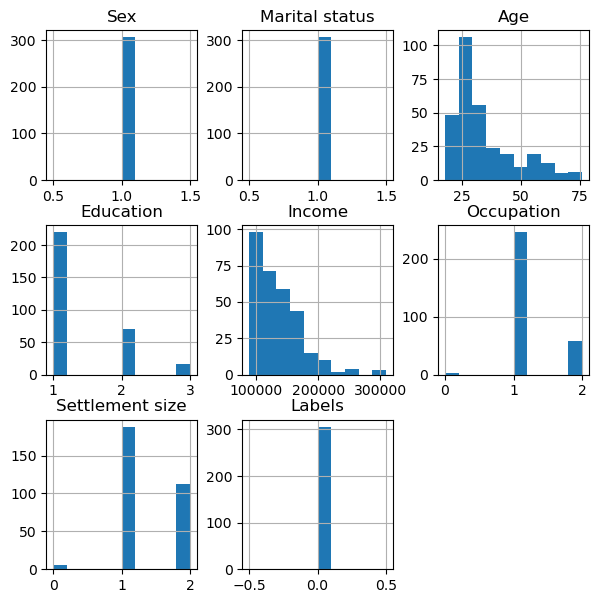

In [165]:
results_df[results_df['Labels'] == 0].hist(figsize=(7,7));


In [167]:
summary[1]

count           mean           std      min       25%  \
Sex              312.0       0.000000      0.000000      0.0      0.00   
Marital status   312.0       0.000000      0.000000      0.0      0.00   
Age              312.0      37.567308     10.633108     21.0     29.75   
Education        312.0       0.737179      0.579524      0.0      0.00   
Income           312.0  102566.410256  26584.893960  43684.0  81804.00   
Occupation       312.0       0.365385      0.501913      0.0      0.00   
Settlement size  312.0       0.060897      0.239526      0.0      0.00   
Labels           312.0       1.000000      0.000000      1.0      1.00   

                      50%        75%       max  
Sex                   0.0       0.00       0.0  
Marital status        0.0       0.00       0.0  
Age                  36.0      42.00      74.0  
Education             1.0       1.00       2.0  
Income           103618.5  120396.75  219319.0  
Occupation            0.0       1.00       2.0  
Settlement size       0.0       0.00       1.0  
Labels                1.0       1.00       1.0

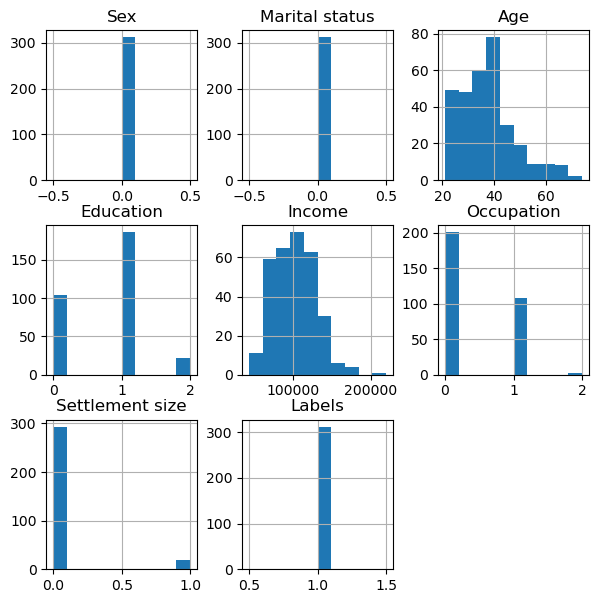

In [168]:
results_df[results_df['Labels'] == 1].hist(figsize=(7,7));


In [169]:
summary[2]

count           mean           std      min       25%  \
Sex              517.0       0.000000      0.000000      0.0       0.0   
Marital status   517.0       0.000000      0.000000      0.0       0.0   
Age              517.0      40.001934     11.945532     20.0      31.0   
Education        517.0       0.822050      0.612576      0.0       0.0   
Income           517.0  145373.611219  38286.684815  82398.0  119276.0   
Occupation       517.0       1.266925      0.484577      0.0       1.0   
Settlement size  517.0       1.529981      0.507283      0.0       1.0   
Labels           517.0       2.000000      0.000000      2.0       2.0   

                      50%       75%       max  
Sex                   0.0       0.0       0.0  
Marital status        0.0       0.0       0.0  
Age                  37.0      47.0      75.0  
Education             1.0       1.0       2.0  
Income           136323.0  159757.0  287247.0  
Occupation            1.0       2.0       2.0  
Settlement size       2.0       2.0       2.0  
Labels                2.0       2.0       2.0

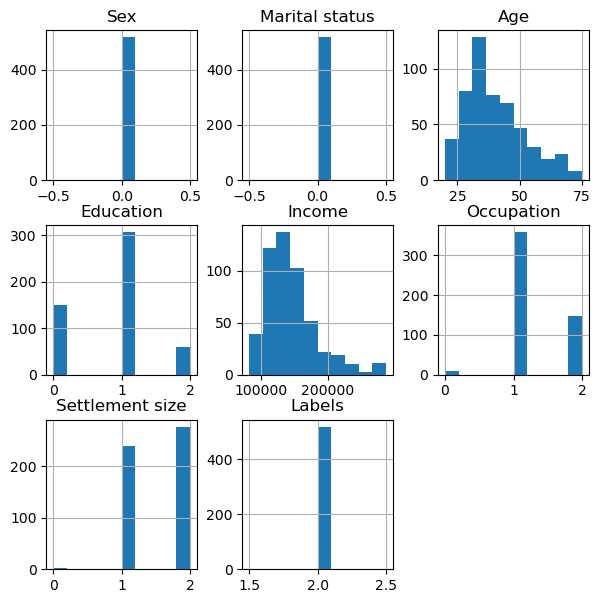

In [171]:
results_df[results_df['Labels'] == 2].hist(figsize=(7,7));


In [172]:
summary[3]

count          mean           std      min      25%  \
Sex              178.0      1.000000      0.000000      1.0      1.0   
Marital status   178.0      0.000000      0.000000      0.0      0.0   
Age              178.0     35.146067      9.755833     19.0     27.0   
Education        178.0      0.932584      0.558403      0.0      1.0   
Income           178.0  97997.241573  21702.050536  36760.0  80892.5   
Occupation       178.0      0.370787      0.507169      0.0      0.0   
Settlement size  178.0      0.073034      0.260926      0.0      0.0   
Labels           178.0      3.000000      0.000000      3.0      3.0   

                      50%       75%       max  
Sex                   1.0       1.0       1.0  
Marital status        0.0       0.0       0.0  
Age                  34.5      41.0      70.0  
Education             1.0       1.0       3.0  
Income           101511.0  113265.0  143321.0  
Occupation            0.0       1.0       2.0  
Settlement size       0.0       0.0       1.0  
Labels                3.0       3.0       3.0

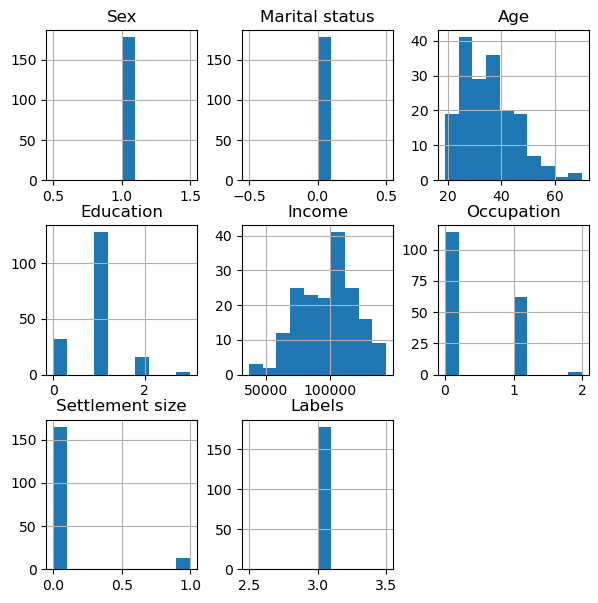

In [173]:
results_df[results_df['Labels'] == 3].hist(figsize=(7,7));
